In [1]:
%matplotlib inline


Create A Hillshade From a Digital Elevation Model Using EarthPy
===============================================================

Learn how to create a hillshade from a DEM using the EarthPy
es.hillshade() function.


Create A Hillshade Layer Using EarthPy
---------------------------------------

<div class="alert alert-info"><h4>Note</h4><p>The examples below show you how to use the ``es.hillshade()``
      function from EarthPy.</p></div>



Create a Hillshade from a Digital Elevation Model (DEM)
-------------------------------------------------------
A hillshade is a 3D representation of a surface. Hillshades are generally
rendered in greyscale. The darker and lighter colors represent the shadows
and highlights that you would visually expect to see in a terrain model.
Hillshades are often used as an underlay in a map, to make the data appear
more 3-Dimensional and thus visually interesting. This vignette will show
you how to create a hillshade from a DEM using EarthPy. It will highlight
how to adjust the sun's azimuth, altitude and other settings that will impact
how the hillshade shadows are modeled in the data.

The hillshade function is a part of the spatial module in EarthPy.



Import Packages
----------------

You will need several packages to get started. You will use Rasterio to
open up the DEM file needed to create the hillshade layer.



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

# Download the data needed for this vignette
data = et.data.get_data("vignette-elevation")

Extracted output to /Users/smighani/earth-analytics/data/vignette-elevation/.


Open up the DEM
---------------
To begin, open your DEM layer as a numpy array using Rasterio. Below you set all
terrain values < 0 to ``nan``. Next, plot the data using ``ep.plot_bands()``.



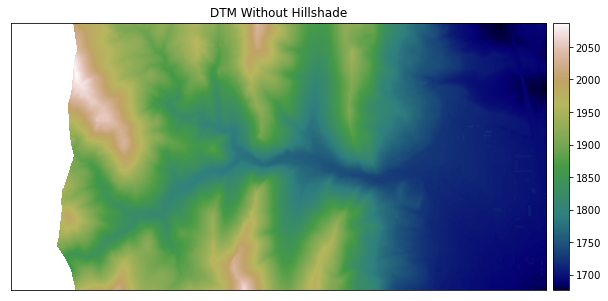

In [3]:
# Set the home directory and get the data for the exercise
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
dtm = "data/vignette-elevation/pre_DTM.tif"

# Open the DEM with Rasterio
with rio.open(dtm) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

Create the Hillshade
--------------------
Once the DEM is read in, call ``es.hillshade()`` to create the hillshade.



/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/earthpy/spatial.py:623: RuntimeWarning: invalid value encountered in sin
  shaded = np.sin(altituderad) * np.sin(slope) + np.cos(
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/earthpy/spatial.py:625: RuntimeWarning: invalid value encountered in cos
  ) * np.cos(slope) * np.cos((azimuthrad - np.pi / 2.0) - aspect)


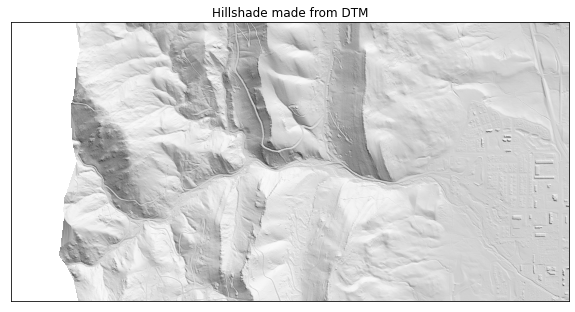

In [4]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()

Change the Azimuth of the Sun
-------------------------------
The angle that sun light hits the landscape, impacts the shadows and highlights
created on the landscape. You can adjust the azimuth values to adjust angle of the
highlights and shadows that are created in your output hillshade. Azimuth numbers can
range from 0 to 360 degrees, where 0 is due North. The default value for azimuth
in ``es.hillshade()`` is 30 degrees.



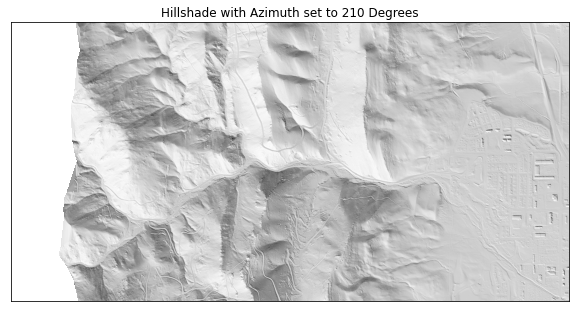

In [5]:
# Change the azimuth of the hillshade layer
hillshade_azimuth_210 = es.hillshade(elevation, azimuth=210)

# Plot the hillshade layer with the modified azimuth
ep.plot_bands(
    hillshade_azimuth_210,
    cbar=False,
    title="Hillshade with Azimuth set to 210 Degrees",
    figsize=(10, 6),
)
plt.show()

Change the Angle Altitude of the Sun
-------------------------------------
Another variable you can adjust for hillshade is what angle of the sun.
The ``angle_altitude`` parameter values range from 0 to 90. 90 represents the sun
shining from directly above the scene. The default value for ``angle_altitude`` in
``es.hillshade()`` is 30 degrees.



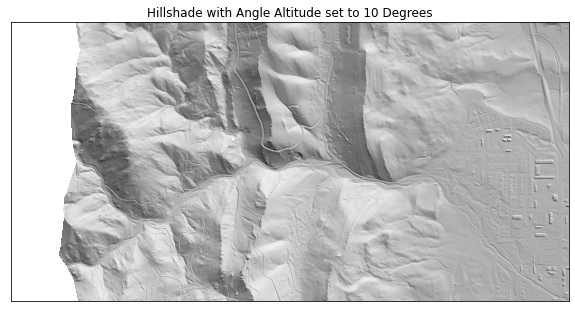

In [6]:
# Adjust the azimuth value
hillshade_angle_10 = es.hillshade(elevation, altitude=10)

# Plot the hillshade layer with the modified angle altitude
ep.plot_bands(
    hillshade_angle_10,
    cbar=False,
    title="Hillshade with Angle Altitude set to 10 Degrees",
    figsize=(10, 6),
)
plt.show()

Overlay a DEM on top of the Hillshade
-------------------------------------
A hillshade can be used to visually enhance a DEM.
To overlay the data, use the ``ep.plot_bands()`` function in EarthPy combined with
``ax.imshow()``. The alpha setting sets the tranparency value for the hillshade layer.



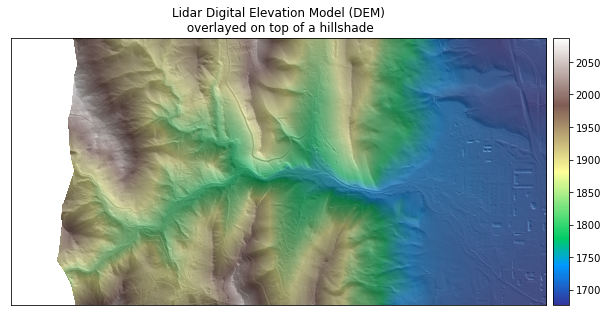

In [7]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()